![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

In [139]:
# QuantBook Analysis Tool 
# For more information see [https://www.quantconnect.com/docs/research/overview]
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import api as smg

qb = QuantBook()
start_time = datetime(2019, 1, 5) # start datetime for history call
end_time = datetime(2019, 12, 3) # end datetime for history call

In [140]:
    #Dickey-Fuller test stolen from https://www.hackdeploy.com/augmented-dickey-fuller-test-in-python/
    def ADF_Stationarity_Test(timeseries, significance_level=0.05, printResults = True):
        is_stationary = None
        
        adf_test = adfuller(timeseries, autolag='AIC')
        pValue = adf_test[1]
        
        if (pValue<significance_level):
            is_stationary = True
        else:
            is_stationary = False
        
        if printResults:
            dfResults = pd.Series(adf_test[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adf_test[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)
            print('Is it stationary? '+str(is_stationary))
        else:
            return is_stationary

symbol     time               
USDCAD 8G  2019-01-06 19:00:00    1.33693
           2019-01-07 19:00:00    1.32969
           2019-01-08 19:00:00    1.32447
           2019-01-09 19:00:00    1.32136
           2019-01-10 19:00:00    1.32394
Name: close, dtype: float64
symbol     time               
USDCAD 8G  2019-11-27 19:00:00    1.328560
           2019-11-28 19:00:00    1.328090
           2019-11-29 19:00:00    1.327820
           2019-12-01 19:00:00    1.328585
           2019-12-02 19:00:00    1.330675
Name: close, dtype: float64
284


/opt/miniconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'USDCAD'}, xlabel='symbol,time'>

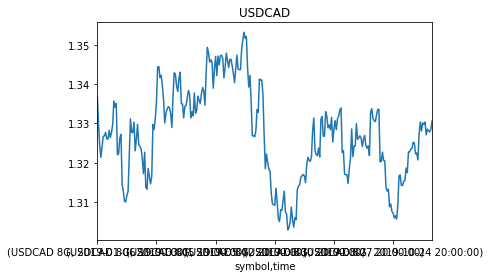

In [141]:
forex = qb.AddForex("USDCAD", Resolution.Daily, Market.Oanda).Symbol
forex_data = qb.History(forex, start_time, end_time)
print(forex_data['close'].head())
print(forex_data['close'].tail())
print(forex_data['close'].size)
forex_data['close'].plot(title='USDCAD')

symbol       time               
WTICOUSD 8I  2019-01-06 19:00:00    48.503
             2019-01-07 19:00:00    48.659
             2019-01-08 19:00:00    49.894
             2019-01-09 19:00:00    52.076
             2019-01-10 19:00:00    52.203
Name: close, dtype: float64
symbol       time               
WTICOUSD 8I  2019-11-27 19:00:00    57.913
             2019-11-28 19:00:00    57.913
             2019-11-29 19:00:00    55.403
             2019-12-01 19:00:00    55.768
             2019-12-02 19:00:00    55.998
Name: close, dtype: float64
284


/opt/miniconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Crude Oil Inverted'}, xlabel='symbol,time'>

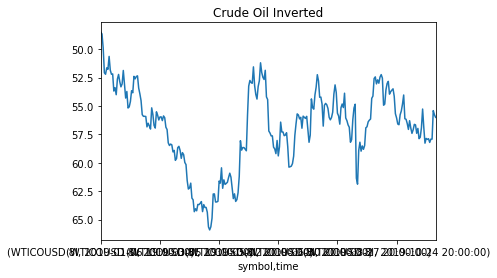

In [142]:
oil = qb.AddCfd("WTICOUSD", Resolution.Daily, Market.Oanda).Symbol
oil_data = qb.History(oil, start_time, end_time)
print(oil_data['close'].head())
print(oil_data['close'].tail())
print(oil_data['close'].size)
plt.gca().invert_yaxis()
oil_data['close'].plot(title='Crude Oil Inverted')


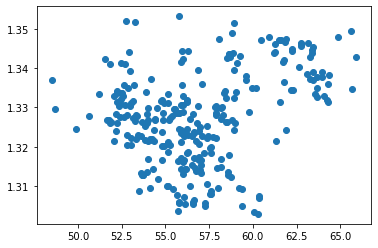

Correlation between time series is  0.28960053914255557


In [143]:
plt.scatter(oil_data['close'].values, forex_data['close'].values)
plt.show()

corr = np.corrcoef(oil_data['close'].values, forex_data['close'])
print("Correlation between time series is ", corr[0][1])

In [144]:
print('Running Augmented Dickey-Fuller Test for Crude Oil...\n')
ADF_Stationarity_Test(oil_data['close'].values)

print('\n\n\n')

print('Running Augmented Dickey-Fuller Test for Forex...\n')
ADF_Stationarity_Test(forex_data['close'].values)




# create a differenced series
def difference(series, interval=1):
    diff = []
    for i in range(interval, len(series)):
        value = series[i] - series[i - interval]
        diff.append(value)
    return diff

Running Augmented Dickey-Fuller Test for Crude Oil...

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -3.073902
P-Value                   0.028546
# Lags Used               0.000000
# Observations Used     283.000000
Critical Value (1%)      -3.453670
Critical Value (5%)      -2.871808
Critical Value (10%)     -2.572241
dtype: float64
Is it stationary? True




Running Augmented Dickey-Fuller Test for Forex...

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -2.910724
P-Value                   0.044115
# Lags Used               0.000000
# Observations Used     283.000000
Critical Value (1%)      -3.453670
Critical Value (5%)      -2.871808
Critical Value (10%)     -2.572241
dtype: float64
Is it stationary? True


Making data stationary...



<AxesSubplot:title={'center':'Stationary Forex'}>

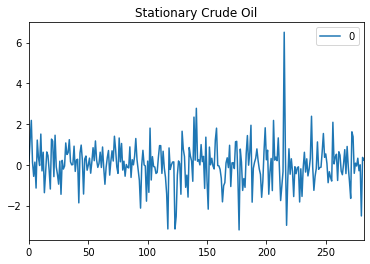

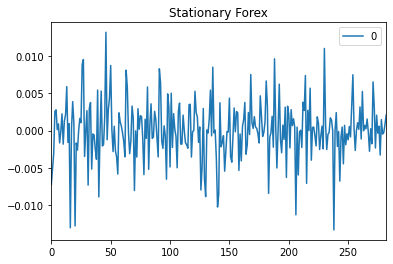

In [147]:
print('Making data stationary...\n')
stationary_oil_data = pd.DataFrame(difference(oil_data['close']))
stationary_forex_data = pd.DataFrame(difference(forex_data['close']))

stationary_oil_data.plot(title='Stationary Crude Oil')
stationary_forex_data.plot(title='Stationary Forex')

In [148]:
print('Running Augmented Dickey-Fuller Test for Stationary Crude Oil...\n')
ADF_Stationarity_Test(stationary_oil_data.values)

print('\n\n\n')

print('Running Augmented Dickey-Fuller Test for Stationary Crude Oil...\n')
ADF_Stationarity_Test(stationary_forex_data.values)

Running Augmented Dickey-Fuller Test for Stationary Crude Oil...

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.139619e+01
P-Value                 7.848072e-21
# Lags Used             2.000000e+00
# Observations Used     2.800000e+02
Critical Value (1%)    -3.453922e+00
Critical Value (5%)    -2.871918e+00
Critical Value (10%)   -2.572300e+00
dtype: float64
Is it stationary? True




Running Augmented Dickey-Fuller Test for Stationary Crude Oil...

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.316812e+01
P-Value                 1.266628e-24
# Lags Used             1.000000e+00
# Observations Used     2.810000e+02
Critical Value (1%)    -3.453838e+00
Critical Value (5%)    -2.871881e+00
Critical Value (10%)   -2.572280e+00
dtype: float64
Is it stationary? True


In [149]:
# Testing for cointegration
print('Testing for Cointegration...\n')
sm.tsa.stattools.coint(stationary_oil_data, stationary_forex_data, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

Testing for Cointegration...



(-12.849898462866625,
 5.676490453711454e-23,
 array([-3.93569812, -3.35788282, -3.05952392]))

In [150]:
oil_cad = pd.DataFrame({'Oil': np.squeeze(stationary_oil_data),
                        'Cad': np.squeeze(stationary_forex_data)})

print('Stationary Oil vs Cad')
oil_cad.head()

Stationary Oil vs Cad


,Oil,Cad
0,0.156,-0.007240
1,1.235,-0.005220
2,2.182,-0.003110
3,0.127,0.002580
4,-0.565,0.002785


In [151]:
# https://medium.com/swlh/using-granger-causality-test-to-know-if-one-time-series-is-impacting-in-predicting-another-6285b9fd2d1c
print('Running Granger Causality Test...\n')
granger_test = grangercausalitytests(oil_cad, maxlag=15)

Running Granger Causality Test...


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0150  , p=0.9027  , df_denom=279, df_num=1
ssr based chi2 test:   chi2=0.0151  , p=0.9020  , df=1
likelihood ratio test: chi2=0.0151  , p=0.9020  , df=1
parameter F test:         F=0.0150  , p=0.9027  , df_denom=279, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0139  , p=0.9862  , df_denom=276, df_num=2
ssr based chi2 test:   chi2=0.0284  , p=0.9859  , df=2
likelihood ratio test: chi2=0.0284  , p=0.9859  , df=2
parameter F test:         F=0.0139  , p=0.9862  , df_denom=276, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1549  , p=0.9265  , df_denom=273, df_num=3
ssr based chi2 test:   chi2=0.4766  , p=0.9240  , df=3
likelihood ratio test: chi2=0.4762  , p=0.9241  , df=3
parameter F test:         F=0.1549  , p=0.9265  , df_denom=273, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F t

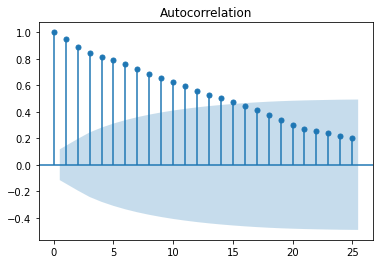

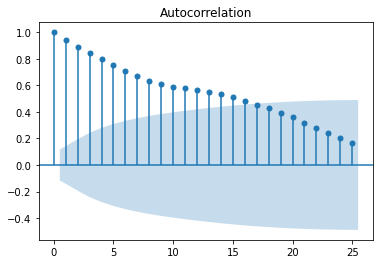

In [152]:
# Auto correlation test on raw data
auto_corr_oil = plot_acf(oil_data['close'].values)
auto_corr_oil.show()

auto_corr_cad = plot_acf(forex_data['close'].values)
auto_corr_cad.show()

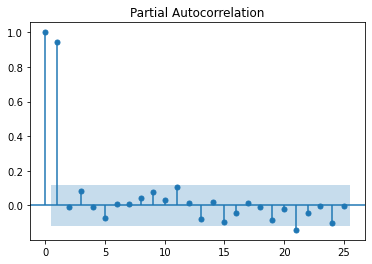

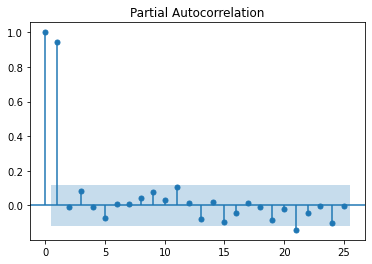

In [153]:
# Partial auto correlation test on raw data
cross_corr_oil = plot_pacf(forex_data['close'].values)
cross_corr_oil.show()

cross_corr_cad = plot_pacf(forex_data['close'].values)
cross_corr_cad.show()

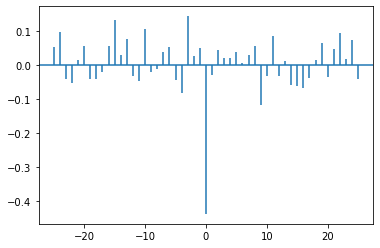

In [154]:
# Cross correlation test on stationary data
xcorr = plt.xcorr(oil_cad['Oil'].values, oil_cad['Cad'].values,  usevlines=True, maxlags=25)
plt.show()

In [ ]:
model = sm.tsa.arima_model.ARIMA(oil_data['close'].values, order=(1, 1, 5))
res = model.fit()
plt.plot(oil_cad['Oil'])
plt.plot(res.fittedvalues*8, color='red')

In [ ]:
print("Check Prediction")
start_time = datetime(2019, 12, 4) # start datetime for history call
end_time = datetime(2019, 12, 17) # end datetime for history call
pred_oil = qb.AddCfd("WTICOUSD", Resolution.Daily, Market.Oanda).Symbol
pred_oil_data = qb.History(oil, start_time, end_time)
res.plot_predict(1,315)
plt.plot(pred_oil_data['close'].values)
